### We will try to predict whether a person will suffer from a heart disease, given the health details of each patient.

#### Attribute Information:

##### age
##### sex
##### chest pain type (4 values)
##### resting blood pressure
##### serum cholestoral in mg/dl
##### fasting blood sugar > 120 mg/dl
##### resting electrocardiographic results (values 0,1,2)
##### maximum heart rate achieved
##### exercise induced angina
##### oldpeak = ST depression induced by exercise relative to rest
##### the slope of the peak exercise ST segment
##### number of major vessels (0-3) colored by flourosopy
##### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv('heart.csv')

In [3]:
#noting the top 5 rows of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#Getting all the summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#checking for missing values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#checking if our dataset is balanced
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

C:\Users\RIYANRIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


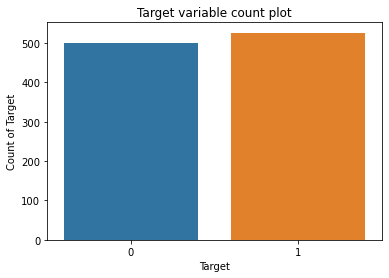

In [10]:
##generating a countplot for no of 0,s and 1's
sns.countplot(df['target'])
plt.xlabel("Target")
plt.ylabel("Count of Target")
plt.title("Target variable count plot")
plt.show()

In [11]:
#creating our feature and Dependent variable sets
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X.shape

(1025, 13)

In [13]:
y.shape

(1025,)

In [14]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=90)

In [16]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameters are internal to an algorithm. 'Hyper' implies the most important. These hyperparameters control the learning rate of an algorithm. We usually go with the default hyperparameters, we will only alter the hyperparameter values when we want to fine tune our model with an objective to improve the models accuracy.

In [18]:
rclf = RandomForestClassifier(criterion='gini',
                              max_depth= 7,
                              n_estimators=100,
                              random_state=5)

#gini index-is a measure of impurity(misclassification),lower the gini index,more important is the variable
#max_depth- no of split/branches a node is allowed to make(dense). default is 3,5,7 we take 7 to be less restrictive.
#n_estimators- no of trees in the random forest. minimum is 50

In [19]:
rclf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=5)

In [20]:
#feature importances
rclf.feature_importances_

array([0.07982943, 0.03802944, 0.15365808, 0.06152743, 0.06626442,
       0.00730495, 0.01550106, 0.10452809, 0.05838257, 0.13942045,
       0.05198031, 0.11309751, 0.11047624])

In [21]:
#displaying features
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
#generating our predictions
y_pred = rclf.predict(X_test)

In [23]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [24]:
#accuracy of our random forest classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[105,   2],
       [  6, 144]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9688715953307393

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(rclf,X_train,y_train,cv=10)

array([0.98701299, 1.        , 0.98701299, 0.96103896, 0.98701299,
       0.96103896, 0.97402597, 0.94805195, 0.98684211, 0.97368421])

### The k-fold cross validation helps us in generalizing the models(models performs on any data) and controls overfitting.